In [1]:
import pickle
from c3sdb.ml.data import C3SD

_SRC_TAGS = [
    "zhou1016", "zhou0817", "zhen0917", "pagl0314", "righ0218", "nich1118",
    "may_0114", "moll0218", "hine1217", "hine0217", "hine0817", "groe0815",
    "bijl0517", "stow0817", "hine0119", "leap0219", "blaz0818", "tsug0220",
    "lian0118", "teja0918", "pola0620", "dodd0220", "celm1120", "belo0321",
    "ross0422", "baker0524", "mull_1223", "palm_0424"
]

data = C3SD("C3S_clean.db", datasets=_SRC_TAGS, seed=2345)
data.assemble_features(encoded_adduct=True, mqn_indices="all", handle_nan="drop")

data.train_test_split("ccs")
data.center_and_scale()
data.show_features()

# - self.N_train_       (training set size -> set by self.train_test_split(...)) 

# - self.X_train_       (training set split of features -> set by self.train_test_split(...))
# - self.y_train_       (training set split of labels -> set by self.train_test_split(...))

# - self.X_test_        (test set split of features -> set by self.train_test_split(...))
# - self.y_test_        (test set split of labels -> set by self.train_test_split(...))

# - self.X_train_ss_    (centered/scaled training set features -> set by self.center_and_scale(...))
# - self.X_test_ss_     (centered/scaled test set features -> set by self.center_and_scale(...))


Added m/z
Added One-Hot Encoding Adducts
Added MQNs
Added Polarization
Feature matrix (first 5 rows):
[[217.3353 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 14.0 0.0 0.0 0.0 0.0
  0.0 0.0 1.0 1.0 0.0 0.0 16.0 7.0 0.0 0.0 5.0 5.0 0.0 5.0 2.0 2.0 1.0
  1.0 0.0 0.0 2.0 4.0 1.0 0.0 6.0 3.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0
  2.0 1.0 23.302910179640744]
 [189.2813 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 12.0 0.0 0.0 0.0 0.0
  0.0 0.0 1.0 1.0 0.0 0.0 14.0 5.0 0.0 0.0 5.0 5.0 0.0 3.0 2.0 2.0 1.0
  1.0 0.0 0.0 2.0 2.0 1.0 0.0 6.0 3.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0
  2.0 1.0 19.705801197604803]
 [375.2141826 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 20.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 5.0 0.0 25.0 16.0 4.0 0.0 5.0 0.0 0.0 12.0 10.0 5.0
  3.0 3.0 0.0 0.0 6.0 12.0 2.0 0.0 1.0 4.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 35.17806946107788]
 [351.2176862 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 20.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 5.0 0.0 25.0 16.0 4.0 0.0 5.0 0.0 0.0 12.0 10.0 5.0
  3.0 

In [2]:
PATH = "Results"
FOLDER = "unclean+polarization+mqn"

with open(PATH + "/" + FOLDER + "/" + "c3sdb_kmcm_svr.pkl", 'rb') as file:
    model = pickle.load(file)
    print(model)

KMCMulti(estimator_params=[{'C': 10000, 'gamma': 0.001},
                           {'C': 1000, 'gamma': 0.001},
                           {'C': 10000, 'gamma': 0.001},
                           {'C': 1000, 'gamma': 0.001}],
         n_clusters=4, seed=2345, use_estimator=SVR(cache_size=1024))


In [3]:
import numpy as np
# 1. Compile The Model's Data (Already Trained)
train_valid_indices = ~np.isnan(data.X_train_ss_).any(axis=1)
train_data_X = data.X_train_ss_[train_valid_indices]
train_data_y = data.y_train_[train_valid_indices]

# Filter NaN rows from testing data
test_valid_indices = ~np.isnan(data.X_test_ss_).any(axis=1)
test_data_X = data.X_test_ss_[test_valid_indices]
test_data_y = data.y_test_[test_valid_indices]

print(data.N_)
print(data.N_train_)
print(data.N_test_)

print(test_data_X.shape)

# Count NaNs
print("Number of NaNs in test_data_X:", np.isnan(test_data_X).sum())
print("Number of NaNs in test_data_X:", np.isnan(train_data_X).sum())

13486
10788
2698
(2449, 54)
Number of NaNs in test_data_X: 0
Number of NaNs in test_data_X: 0


In [4]:
# 2. Run Inference On Model's Settings
print("Computing predictions and metrics for the training data.")
y_pred_train = model.predict(train_data_X)

print("Computing predictions and metrics for the testing data.")
y_pred_test = model.predict(test_data_X)

Computing predictions and metrics for the training data.
Computing predictions and metrics for the testing data.


In [5]:
print("y_train shape:", train_data_y.shape)
print("y_pred_train shape:", y_pred_train.shape)

print("y_test shape:", test_data_y.shape)
print("y_pred_test shape:", y_pred_test.shape)

y_train shape: (9776,)
y_pred_train shape: (9776,)
y_test shape: (2449,)
y_pred_test shape: (2449,)


Calculating performance metrics.
Generating summary figure and saving it


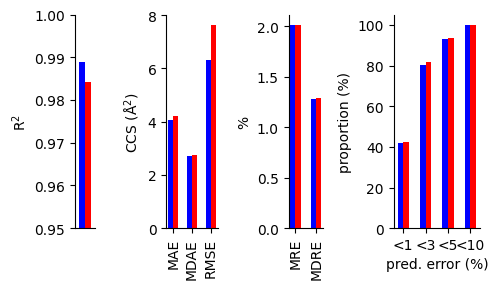

In [6]:
from c3sdb.ml.metrics import compute_metrics_train_test, train_test_summary_figure

#Calculate performance metrics
print("Calculating performance metrics.")
summary_new = compute_metrics_train_test(train_data_y, test_data_y, y_pred_train, y_pred_test)

#Generate summary figure
print("Generating summary figure and saving it")
train_test_summary_figure(summary_new, "clean_polarz.png")

In [7]:
import pandas as pd 
model_stats_new = pd.DataFrame(summary_new)
model_stats_new.to_csv("metrics_clean_polarz.csv")

ImportError: _multiarray_umath failed to import